In [2]:
#importing necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc

In [5]:
#importing data
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


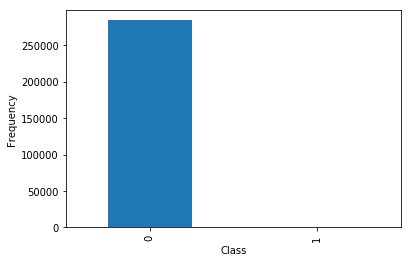

In [6]:
#checking Unbalanced Data
count_classes = pd.value_counts(data['Class'])
count_classes_log = np.log10(count_classes)
count_classes.plot(kind = "bar")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

 **This Shows Imabalanced Classes. As you can see Class 1 i.e frauds is almost 0. To get a better view of this we will take a look at Log of values**

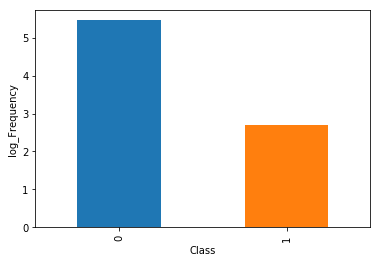

In [7]:
# Log graph
count_classes_log.plot(kind = 'bar')
plt.xlabel("Class")
plt.ylabel("log_Frequency")
plt.show()

**This gives us a better view of how imbalanced classes are.**

**As we can see values in various columns are not scaled and using such unscaled values can cause our classifiers to give inaccurate results.**

In [8]:
#Scaling data
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data =  data.drop(["Time", "Amount"], axis = 1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [9]:
#Splitting into Feature and label data
x = data.drop(["Class"], axis = 1)
y = data["Class"]

In [10]:
#performing SMOTE to solve Unbalanced Classes
smote = SMOTE(random_state= 42)
x_new, y_new = smote.fit_sample(x, y)
print(len(y_new[y_new == 1]))

284315


In [11]:
#splitting into train-test data
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, random_state = 42, test_size = 0.2 )

In [12]:
#fitting RandomForestClassifier Model
rf =  RandomForestClassifier()
rf.fit(x_train, y_train)

C:\Users\GODFATHER\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [13]:
#Predicting labels
y_pred = rf.predict(x_test)

In [14]:
#measuring Accuracy Score
accuracy_score(y_test, y_pred)

0.999903276295658

In [15]:
#Measuring Roc_Auc score
roc_auc_score(y_test, y_pred)

0.9999030837004405

In [16]:
#Preparing ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

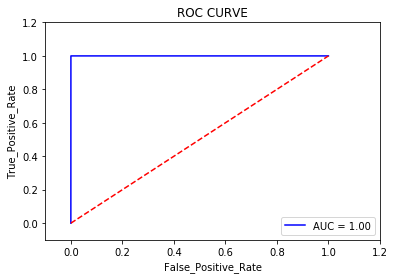

In [17]:
#Plotting ROC Curve
plt.title('ROC CURVE')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True_Positive_Rate')
plt.xlabel('False_Positive_Rate')
plt.show()